# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load CSV file 

In [108]:
df=pd.read_csv("Superstore.csv")
df.head(2)

,RowId,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2021-152156,11/8/2021,11/11/2021,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2021-152156,11/8/2021,11/11/2021,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


<h1> 1. Perform Exploratory Data Analysis -</h1>

# a. Check the summary

In [3]:
# we can check the summary using .info(), we use .info() because it helps us understand the structure of our dataset.
# It shows the number of rows and columns, the data types of each column, and It also indicates if there are any missing values in the columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RowId           9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

# b. Shape of the dataset

In [4]:
# shape is used to check the size of the dataset and it returns the size as a tuple format

data=df.shape
print(f"The Shape of the dataset : {data}")

The Shape of the dataset : (9994, 21)


# c. Statistical summary

In [5]:
# describe shows statistical summary

df.describe()

,RowId,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55245.233297,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# d. Display all numerical and categorical columns

In [6]:
#we get all numerical_columns using built in method 
numerical_column=df._get_numeric_data().columns
numerical_column

Index(['RowId', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [7]:
# we get all categorical columns using select_dtypes method
categorical_column= df.select_dtypes(include=['object', 'category']).columns
categorical_column

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country/Region', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name'],
      dtype='object')

# e. Check for missing values

In [110]:
# df.isna().sum() method is used to count the number of missing values  in each column of the dataset
df.isna().sum()

RowId              0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

# 2. Solve - 

## a. What are the top 5 most frequently ordered products?

In [10]:
data=df['Product Name'].value_counts().index[:5]

In [11]:
data

Index(['Staple envelope', 'Easy-staple paper', 'Staples',
       'Avery Non-Stick Binders', 'Staples in misc. colors'],
      dtype='object', name='Product Name')

In [12]:
data_counts=[48, 46, 46, 20, 19]

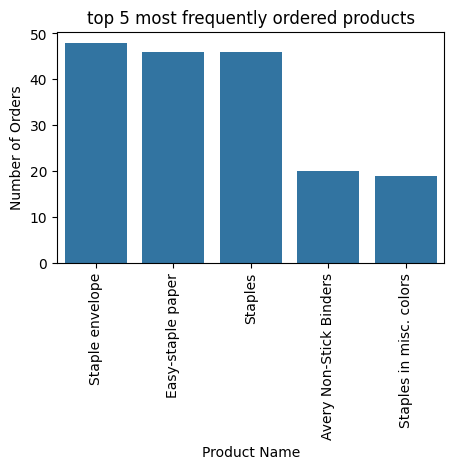

In [13]:
plt.figure(figsize=(5,3))
sns.barplot(x=data,y=data_counts)
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.title('top 5 most frequently ordered products')
plt.xticks(rotation=90)

plt.show()

# b. How many unique customers are there, and which customer has placed the most orders?

In [14]:
data_1=df['Customer Name'].nunique()
print(f"{data_1} unique customers are there")

793 unique customers are there


In [15]:
data_2=df['Customer Name'].value_counts().index[:1]
print(f"{data_2} has placed the most orders ")

Index(['William Brown'], dtype='object', name='Customer Name') has placed the most orders 


# c. How do monthly or yearly sales trends look over time?

In [16]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [17]:
df['month'] = df['Order Date'].dt.month
df.head(2)

,RowId,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month
0,1,CA-2021-152156,2021-11-08,11/11/2021,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11
1,2,CA-2021-152156,2021-11-08,11/11/2021,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11


In [18]:
df['year']=df['Order Date'].dt.year
df.head(2)

,RowId,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month,year
0,1,CA-2021-152156,2021-11-08,11/11/2021,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,2021
1,2,CA-2021-152156,2021-11-08,11/11/2021,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11,2021


In [19]:
Month_Sales=df.groupby('month')['Sales'].sum()
Month_Sales

month
1      94924.8356
2      59751.2514
3     205005.4888
4     137762.1286
5     155028.8117
6     152718.6793
7     147238.0970
8     159044.0630
9     307649.9457
10    200322.9847
11    352461.0710
12    325293.5035
Name: Sales, dtype: float64

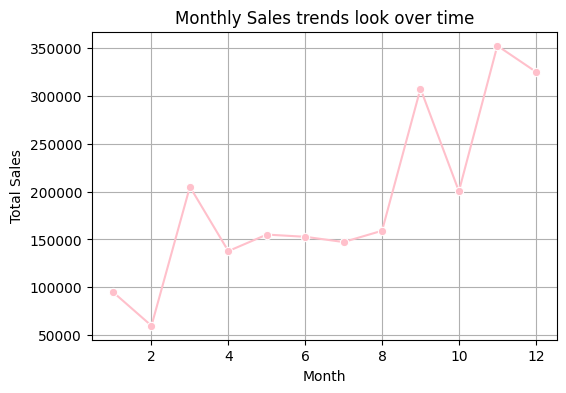

In [20]:
plt.figure(figsize=(6, 4))
sns.lineplot(x=Month_Sales.index, y=Month_Sales.values, marker='o', color='pink')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales trends look over time')
plt.grid()
plt.show()


In [21]:
year_sales=df.groupby('year')['Sales'].sum()
year_sales

year
2019    484247.4981
2020    470532.5090
2021    609205.5980
2022    733215.2552
Name: Sales, dtype: float64

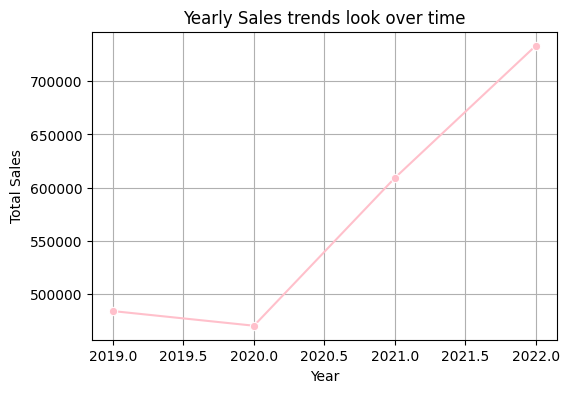

In [22]:
plt.figure(figsize=(6, 4))
sns.lineplot(x=year_sales.index, y=year_sales.values, marker='o', color='pink')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Yearly Sales trends look over time')
plt.grid()
plt.show()

# d. What are the peak and low sales months for each year?

In [23]:
Sales=df.groupby(['year','month'])['Sales'].sum()
Sales

year  month
2019  1         14236.8950
      2          4519.8920
      3         55691.0090
      4         28295.3450
      5         23648.2870
      6         34595.1276
      7         33946.3930
      8         27909.4685
      9         81777.3508
      10        31453.3930
      11        78628.7167
      12        69545.6205
2020  1         18174.0756
      2         11951.4110
      3         38726.2520
      4         34195.2085
      5         30131.6865
      6         24797.2920
      7         28765.3250
      8         36898.3322
      9         64595.9180
      10        31404.9235
      11        75972.5635
      12        74919.5212
2021  1         18542.4910
      2         22978.8150
      3         51715.8750
      4         38750.0390
      5         56987.7280
      6         40344.5340
      7         39261.9630
      8         31115.3743
      9         73410.0249
      10        59687.7450
      11        79411.9658
      12        96999.0430
2022  1         

In [24]:
peak_sales=Sales.groupby('year').idxmax()
peak_sales

year
2019     (2019, 9)
2020    (2020, 11)
2021    (2021, 12)
2022    (2022, 11)
Name: Sales, dtype: object

In [25]:
low_sales=Sales.groupby('year').idxmin()
low_sales

year
2019    (2019, 2)
2020    (2020, 2)
2021    (2021, 1)
2022    (2022, 2)
Name: Sales, dtype: object

# 3. Category-Based Analysis -

 # a. What are the top-selling categories and sub-categories?

In [94]:
category=df.groupby(['Category'])['Sales'].sum().sort_values(ascending=False).reset_index()
category

,Category,Sales
0,Technology,836154.0330
1,Furniture,741999.7953
2,Office Supplies,719047.0320


In [95]:
Subcategory=df.groupby(['Sub-Category'])['Sales'].sum().sort_values(ascending=False).reset_index()
Subcategory

,Sub-Category,Sales
0,Phones,330007.0540
1,Chairs,328449.1030
2,Storage,223843.6080
3,Tables,206965.5320
4,Binders,203412.7330
5,Machines,189238.6310
6,Accessories,167380.3180
7,Copiers,149528.0300
8,Bookcases,114879.9963
9,Appliances,107532.1610


In [106]:
top_selling=df.groupby(['Category','Sub-Category'])['Sales'].sum().aggregate(['idxmax'])
print(f" Top-selling categories and sub-categories : {top_selling}")

 Top-selling categories and sub-categories : idxmax    (Technology, Phones)
Name: Sales, dtype: object


# b. How does the average order quantity vary across different categories?

In [101]:
average=df.groupby('Category')['Quantity'].mean().reset_index()

In [102]:
average

,Category,Quantity
0,Furniture,3.785007
1,Office Supplies,3.801195
2,Technology,3.756903


# 4. Sales Performance by Region -

# a. Which region has the highest sales, and how do sales compare across regions?

In [90]:
region=df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

In [91]:
region

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

In [92]:
print(region.idxmax(),"has the highest sales")

West has the highest sales


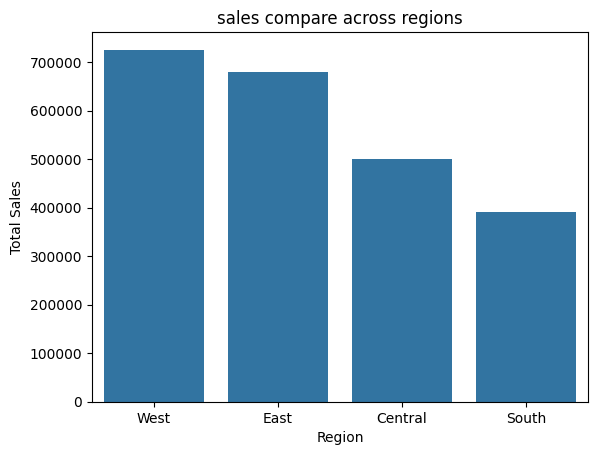

In [93]:
sns.barplot(x=region.index,y=region.values)
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('sales compare across regions')
plt.show()

# b. What is the distribution of sales across different states and cities?


In [69]:
states=df.groupby(['State','City'])['Sales'].sum().sort_values(ascending=False).reset_index()

In [70]:
states

,State,City,Sales
0,New York,New York City,256368.161
1,California,Los Angeles,175851.341
2,Washington,Seattle,119540.742
3,California,San Francisco,112669.092
4,Pennsylvania,Philadelphia,109077.013
...,...,...,...
599,Florida,Ormond Beach,2.808
600,Florida,Pensacola,2.214
601,Florida,Jupiter,2.064
602,Ohio,Elyria,1.824


# 5. Customer Segmentation -

# a. What is the distribution of customers across segments (e.g., Consumer, Corporate)?

In [67]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [80]:
seg=df.groupby('Segment')['Customer Name'].count()

In [81]:
seg

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: Customer Name, dtype: int64

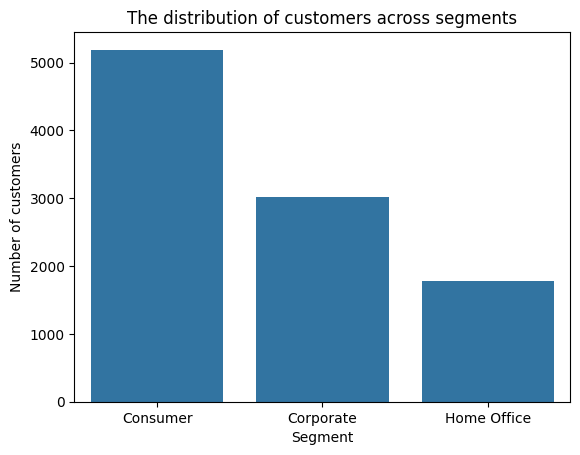

In [82]:
sns.barplot(x=seg.index, y=seg.values)
plt.xlabel('Segment')
plt.ylabel('Number of customers')
plt.title('The distribution of customers across segments')
plt.show()

# b. Who are the top customers in each segment based on total sales or order count?

In [49]:
data=df.groupby(['Segment','Customer Name'])['Sales'].sum().sort_values(ascending=False).reset_index()
data

,Segment,Customer Name,Sales
0,Home Office,Sean Miller,25043.050
1,Corporate,Tamara Chand,19052.218
2,Consumer,Raymond Buch,15117.339
3,Home Office,Tom Ashbrook,14595.620
4,Consumer,Adrian Barton,14473.571
...,...,...,...
788,Home Office,Roy Skaria,22.328
789,Corporate,Mitch Gastineau,16.739
790,Corporate,Carl Jackson,16.520
791,Corporate,Lela Donovan,5.304


In [48]:
data=df.groupby(['Segment','Customer Name'])['Order ID'].count().sort_values(ascending=False).reset_index()
data

,Segment,Customer Name,Order ID
0,Consumer,William Brown,37
1,Home Office,Matt Abelman,34
2,Consumer,John Lee,34
3,Home Office,Paul Prost,34
4,Consumer,Seth Vernon,32
...,...,...,...
788,Consumer,Jocasta Rupert,1
789,Corporate,Lela Donovan,1
790,Consumer,Ricardo Emerson,1
791,Corporate,Carl Jackson,1
